In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train,test], ignore_index=True)

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [11]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [12]:
pd.set_option("display.max_rows", None)

In [13]:
df.isnull().any()

id               False
mssubclass       False
mszoning          True
lotfrontage       True
lotarea          False
street           False
alley             True
lotshape         False
landcontour      False
utilities         True
lotconfig        False
landslope        False
neighborhood     False
condition1       False
condition2       False
bldgtype         False
housestyle       False
overallqual      False
overallcond      False
yearbuilt        False
yearremodadd     False
roofstyle        False
roofmatl         False
exterior1st       True
exterior2nd       True
masvnrtype        True
masvnrarea        True
exterqual        False
extercond        False
foundation       False
bsmtqual          True
bsmtcond          True
bsmtexposure      True
bsmtfintype1      True
bsmtfinsf1        True
bsmtfintype2      True
bsmtfinsf2        True
bsmtunfsf         True
totalbsmtsf       True
heating          False
heatingqc        False
centralair       False
electrical        True
1stflrsf   

In [14]:
df.isnull().sum()

id                  0
mssubclass          0
mszoning            4
lotfrontage       486
lotarea             0
street              0
alley            2721
lotshape            0
landcontour         0
utilities           2
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         1
exterior2nd         1
masvnrtype         24
masvnrarea         23
exterqual           0
extercond           0
foundation          0
bsmtqual           81
bsmtcond           82
bsmtexposure       82
bsmtfintype1       79
bsmtfinsf1          1
bsmtfintype2       80
bsmtfinsf2          1
bsmtunfsf           1
totalbsmtsf         1
heating             0
heatingqc           0
centralair          0
electrical          1
1stflrsf            0
2ndflrsf            0
lowqualfin

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2919 non-null   int64  
 1   mssubclass     2919 non-null   int64  
 2   mszoning       2915 non-null   object 
 3   lotfrontage    2433 non-null   float64
 4   lotarea        2919 non-null   int64  
 5   street         2919 non-null   object 
 6   alley          198 non-null    object 
 7   lotshape       2919 non-null   object 
 8   landcontour    2919 non-null   object 
 9   utilities      2917 non-null   object 
 10  lotconfig      2919 non-null   object 
 11  landslope      2919 non-null   object 
 12  neighborhood   2919 non-null   object 
 13  condition1     2919 non-null   object 
 14  condition2     2919 non-null   object 
 15  bldgtype       2919 non-null   object 
 16  housestyle     2919 non-null   object 
 17  overallqual    2919 non-null   int64  
 18  overallc

In [16]:
df['lotfrontage'] = df['lotfrontage'].fillna(df['lotfrontage'].mean())
df['bsmtcond']= df['bsmtcond'].fillna(df['bsmtcond'].mode()[0])
df['bsmtqual']= df['bsmtqual'].fillna(df['bsmtqual'].mode()[0])
df['fireplacequ']= df['fireplacequ'].fillna(df['fireplacequ'].mode()[0])
df['garagetype']= df['garagetype'].fillna(df['garagetype'].mode()[0])
df['garagefinish']= df['garagefinish'].fillna(df['garagefinish'].mode()[0])
df['garagequal']= df['garagequal'].fillna(df['garagequal'].mode()[0])
df['garagecond']= df['garagecond'].fillna(df['garagecond'].mode()[0])
df['mszoning']= df['mszoning'].fillna(df['mszoning'].mode()[0])

In [17]:
df.isnull().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage         0
lotarea             0
street              0
alley            2721
lotshape            0
landcontour         0
utilities           2
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         1
exterior2nd         1
masvnrtype         24
masvnrarea         23
exterqual           0
extercond           0
foundation          0
bsmtqual            0
bsmtcond            0
bsmtexposure       82
bsmtfintype1       79
bsmtfinsf1          1
bsmtfintype2       80
bsmtfinsf2          1
bsmtunfsf           1
totalbsmtsf         1
heating             0
heatingqc           0
centralair          0
electrical          1
1stflrsf            0
2ndflrsf            0
lowqualfin

In [18]:
pd.set_option("display.max_columns", None)

In [19]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [20]:
df.value_counts()

Series([], dtype: int64)

In [21]:
df['mszoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: mszoning, dtype: int64

In [22]:
df['mszoning']= df['mszoning'].fillna(df['mszoning'].mode()[0])


In [23]:
df.isnull().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage         0
lotarea             0
street              0
alley            2721
lotshape            0
landcontour         0
utilities           2
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         1
exterior2nd         1
masvnrtype         24
masvnrarea         23
exterqual           0
extercond           0
foundation          0
bsmtqual            0
bsmtcond            0
bsmtexposure       82
bsmtfintype1       79
bsmtfinsf1          1
bsmtfintype2       80
bsmtfinsf2          1
bsmtunfsf           1
totalbsmtsf         1
heating             0
heatingqc           0
centralair          0
electrical          1
1stflrsf            0
2ndflrsf            0
lowqualfin

In [24]:
df.exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: exterior1st, dtype: int64

In [25]:
df.exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: exterior2nd, dtype: int64

In [26]:
df['exterior1st']= df['exterior1st'].fillna(df['exterior1st'].mode()[0])
df['exterior2nd']= df['exterior2nd'].fillna(df['exterior2nd'].mode()[0])

In [27]:
df.drop(['garageyrblt','poolqc','fence','miscfeature'], axis=1, inplace=True)

In [28]:
df.shape

(2919, 78)

In [29]:
df.isnull().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage         0
lotarea             0
street              0
alley            2721
lotshape            0
landcontour         0
utilities           2
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype         24
masvnrarea         23
exterqual           0
extercond           0
foundation          0
bsmtqual            0
bsmtcond            0
bsmtexposure       82
bsmtfintype1       79
bsmtfinsf1          1
bsmtfintype2       80
bsmtfinsf2          1
bsmtunfsf           1
totalbsmtsf         1
heating             0
heatingqc           0
centralair          0
electrical          1
1stflrsf            0
2ndflrsf            0
lowqualfin

In [30]:
df['saleprice']= df['saleprice'].fillna(df['saleprice'].mean())
df['masvnrarea']= df['masvnrarea'].fillna(df['masvnrarea'].mode()[0])
df['masvnrtype']= df['masvnrtype'].fillna(df['masvnrtype'].mode()[0])

In [31]:
df['bsmtexposure']= df['bsmtexposure'].fillna(df['bsmtexposure'].mode()[0])
df['bsmtfintype1']= df['bsmtfintype1'].fillna(df['bsmtfintype1'].mode()[0])
df['bsmtfintype2']= df['bsmtfintype2'].fillna(df['bsmtfintype2'].mode()[0])

In [32]:
df.drop(['alley'], axis=1, inplace=True)

In [33]:
df.shape

(2919, 77)

In [34]:
df.isnull().sum()

id               0
mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
lotshape         0
landcontour      0
utilities        2
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
masvnrarea       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfinsf1       1
bsmtfintype2     0
bsmtfinsf2       1
bsmtunfsf        1
totalbsmtsf      1
heating          0
heatingqc        0
centralair       0
electrical       1
1stflrsf         0
2ndflrsf         0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     2
bsmthalfbath     2
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr     0
kitchenqual 

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(2909, 77)

In [37]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'openpo

In [38]:
df['bsmtfinsf1']= df['bsmtfinsf1'].fillna(df['bsmtfinsf1'].mean())
df['bsmtfinsf2']= df['bsmtfinsf2'].fillna(df['bsmtfinsf2'].mean())
df['bsmtunfsf']= df['bsmtunfsf'].fillna(df['bsmtunfsf'].mean())
df['totalbsmtsf']= df['totalbsmtsf'].fillna(df['totalbsmtsf'].mean())
df['garagearea']= df['garagearea'].fillna(df['garagearea'].mean())
df['garagecars']= df['garagecars'].fillna(df['garagecars'].mean())

In [39]:
df.isnull().sum()

id               0
mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
lotshape         0
landcontour      0
utilities        0
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
masvnrarea       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfinsf1       0
bsmtfintype2     0
bsmtfinsf2       0
bsmtunfsf        0
totalbsmtsf      0
heating          0
heatingqc        0
centralair       0
electrical       0
1stflrsf         0
2ndflrsf         0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     0
bsmthalfbath     0
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr     0
kitchenqual 

In [40]:
df.shape

(2909, 77)

In [41]:
df.drop(['source'], axis=1, inplace=True)

In [42]:
df.shape

(2909, 76)

In [43]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [44]:
df.garagefinish.value_counts()

Unf    1380
RFn     811
Fin     718
Name: garagefinish, dtype: int64

<AxesSubplot:>

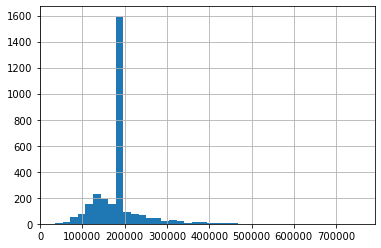

In [45]:
df['saleprice'].hist(bins=40)

<AxesSubplot:>

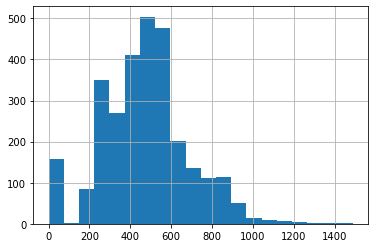

In [46]:
df.garagearea.hist(bins=20)

In [47]:
numerical_cols = [cname for cname in df if 
                 df[cname].dtypes in ['int64', 'float64']]
df = df[numerical_cols]
df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=20)

In [50]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [51]:
df_full_train.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
1955,1956,60,69.305795,12511,7,7,1978,1978,168.0,988.0,0.0,432.0,1420.0,1420,1420,0,2840,0.0,1.0,2,1,4,1,8,2,4.0,1314.0,0,16,0,0,208,0,0,12,2008,180921.19589
2817,2818,85,72.000000,10820,5,7,1971,1972,153.0,535.0,159.0,88.0,782.0,810,0,0,810,1.0,0.0,1,0,2,1,4,0,2.0,576.0,0,0,0,0,0,0,0,6,2006,180921.19589
2857,2858,20,65.000000,8772,7,5,2005,2006,0.0,996.0,0.0,340.0,1336.0,1336,0,0,1336,1.0,0.0,2,0,3,1,6,0,2.0,502.0,136,43,0,0,0,0,0,9,2006,180921.19589
937,938,60,75.000000,9675,7,5,2005,2005,0.0,341.0,0.0,772.0,1113.0,1113,858,0,1971,0.0,0.0,2,1,3,1,8,1,2.0,689.0,0,48,0,0,0,0,0,2,2009,253000.00000
1560,1561,90,72.000000,10773,4,3,1967,1967,72.0,704.0,0.0,1128.0,1832.0,1832,0,0,1832,2.0,0.0,2,0,4,2,8,0,0.0,0.0,0,58,0,0,0,0,0,5,2010,180921.19589


In [52]:
y_train = df_train.saleprice
y_val = df_val.saleprice
y_test = df_test.saleprice

In [53]:
del df_train['saleprice']
del df_val['saleprice']
del df_test['saleprice']

In [54]:
df_train.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
395,396,20,68.0,9571,5,6,1956,1956,0.0,739.0,0.0,405.0,1144.0,1144,0,0,1144,1.0,0.0,1,0,3,1,6,0,1.0,596.0,44,0,0,0,0,0,0,6,2010
607,608,20,78.0,7800,5,8,1948,2002,0.0,603.0,0.0,293.0,896.0,1112,896,0,2008,1.0,0.0,3,0,3,1,8,0,1.0,230.0,103,0,0,0,0,0,0,8,2006
2584,2585,20,80.0,10000,5,5,2002,2002,166.0,585.0,0.0,856.0,1441.0,1392,0,0,1392,0.0,0.0,2,0,3,1,6,1,3.0,650.0,168,49,0,0,0,0,0,12,2007
778,779,90,60.0,8400,5,5,1977,1977,320.0,0.0,0.0,0.0,0.0,2020,0,0,2020,0.0,0.0,2,0,4,2,10,2,2.0,630.0,0,0,0,0,0,0,0,10,2007
2868,2869,50,62.0,8707,4,5,1924,1950,0.0,0.0,0.0,1093.0,1093.0,1093,576,0,1669,0.0,0.0,1,1,4,1,9,0,1.0,288.0,0,0,56,0,0,0,0,5,2006


In [55]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [94]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(df_train, y_train, test_size= 0.2, random_state=42)

In [95]:
lin = LinearRegression()

In [96]:
lin.fit(xtrain,ytrain)

LinearRegression()

In [97]:
print(lin.coef_)
lin.intercept_

[ 2.59594149e+00 -7.86035373e+01 -1.50918730e+01  6.95138058e-01
  6.29621890e+03  4.21991391e+03  2.89685632e+02 -2.62613387e+01
 -5.55069439e+00  8.66613847e+00 -2.44689339e+00  8.68359044e-01
  7.08760412e+00  1.51851368e+01  2.48263023e+01 -2.76143717e+01
  1.23970674e+01 -1.25984906e+02 -6.06501325e+03  1.67823537e+03
 -5.42315629e+03 -1.15778368e+04 -1.73341809e+04  6.13527876e+03
 -1.86648903e+03  2.51605769e+03 -9.30847797e-01  8.62426727e+00
 -1.64215678e+01  6.62999102e-01  9.51562408e+00  2.18050579e+01
  8.64920668e+01 -7.93139434e+00  1.04390402e+03  8.20049525e+02]


-2106698.132106109

In [98]:
pred = lin.predict(df_test)
pred

array([135437.42948451, 146713.9070338 , 136914.39438882, 169868.48328454,
       163920.19820999, 197423.16216463, 240754.56436155, 211493.1881021 ,
       209341.65153523, 152514.25799923, 154165.44228777, 247453.03265966,
       180625.89055751, 189646.90243993, 276925.9241622 , 234985.16709552,
       138452.05068117, 270786.22673024, 146431.04201043, 195729.56676429,
       212412.01616002, 169869.6548146 , 236854.97022391, 156254.84386459,
       196799.10635293, 173477.86175123, 271273.08014742, 247334.91947666,
       162424.40168863, 195257.92053436, 170814.36164864, 206255.12386862,
       175019.90088741, 231374.40222373, 163437.183651  , 155752.56949439,
       198748.8013831 , 137152.76127744, 150475.39962573, 199615.61115978,
       171333.67484614, 145746.92898077, 220644.34072928, 147039.67393395,
       185158.71222263, 190748.09844971, 148352.66861612, 141324.8144276 ,
       143446.1986131 , 151055.88508062, 147891.90372164, 188869.44297221,
       236718.80794867, 1

In [61]:
import xgboost
import math

In [101]:
print(math.sqrt(mean_squared_error(y_test, pred)))

44651.0300549239


In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [103]:
train_dicts = df_train.to_dict(orient='records')

In [104]:
 xi =train_dicts[:5]

In [105]:
dv = DictVectorizer(sparse=False)

In [106]:
X_train = dv.fit_transform(train_dicts)

In [107]:
y_train = y_train.astype('int').values
y_val = y_val.astype('int').values
y_test = y_test.astype('int').values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [108]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
dv.get_feature_names()

C:\Users\dston\anaconda3\envs\DLposeidon\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1stflrsf',
 '2ndflrsf',
 '3ssnporch',
 'bedroomabvgr',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtfullbath',
 'bsmthalfbath',
 'bsmtunfsf',
 'enclosedporch',
 'fireplaces',
 'fullbath',
 'garagearea',
 'garagecars',
 'grlivarea',
 'halfbath',
 'id',
 'kitchenabvgr',
 'lotarea',
 'lotfrontage',
 'lowqualfinsf',
 'masvnrarea',
 'miscval',
 'mosold',
 'mssubclass',
 'openporchsf',
 'overallcond',
 'overallqual',
 'poolarea',
 'screenporch',
 'totalbsmtsf',
 'totrmsabvgrd',
 'wooddecksf',
 'yearbuilt',
 'yearremodadd',
 'yrsold']

In [110]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [111]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [112]:
from sklearn.tree import export_text

In [113]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- id <= 1459.50
|   |--- 3ssnporch <= 363.50
|   |   |--- class: 155000
|   |--- 3ssnporch >  363.50
|   |   |--- class: 180500
|--- id >  1459.50
|   |--- class: 180921



C:\Users\dston\anaconda3\envs\DLposeidon\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [115]:
lin = LinearRegression()
rigde = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [116]:
def rsqr_score(test, pred):

    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):


    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_
def print_score(test, pred, model):


    print(f"- Regressor: {model}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [125]:
lin_scores = -1 * cross_val_score(lin, xtrain,ytrain, cv=5)
print("MSE scores (Linear Model):\n", lin_scores)
print("Mean MSE scores:", lin_scores.mean())

MSE scores (Linear Model):
 [-0.39518072 -0.20879532 -0.21642608 -0.4274917  -0.36966883]
Mean MSE scores: -0.3235125289108704


In [126]:
lin.fit(xtrain, ytrain)
lin_y_pred = lin.predict(xtest)
print_score(ytest, lin_y_pred, "Linear")

- Regressor: Linear
R²: 0.3887747420993758
RMSE: 47713.18638835363



In [129]:
ridge_sc = -1 * cross_val_score(rigde, xtrain, xtrain, cv=5)

print("MSE scores (Ridge Model):\n", ridge_sc)
print("Mean MSE scores:", ridge_sc.mean())

MSE scores (Ridge Model):
 [-0.99997679 -0.99997455 -0.97219151 -0.99997316 -0.99996601]
Mean MSE scores: -0.9944164036497842


In [130]:
rigde.fit(xtrain, ytrain)
rigde_y_pred = rigde.predict(xtest)
print_score(ytest, rigde_y_pred, "Ridge")

- Regressor: Ridge
R²: 0.38880930989370244
RMSE: 47711.837161605676



In [82]:
lasso_sc = -1 * cross_val_score(lasso, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')

print("MSE scores (Lasso Model):\n", lasso_sc)
print("Mean MSE scores:", lasso_sc.mean())

MSE scores (Lasso Model):
 [1.62390259e+09 2.59345161e+09 2.02292725e+09 1.33434053e+09
 2.59089079e+09]
Mean MSE scores: 2033102553.6802108


In [83]:
lasso.fit(xtrain, ytrain)
lasso_y_pred = lasso.predict(xtest)
print_score(ytest, lasso_y_pred, "Lasso")

- Regressor: Lasso
R²: 0.33684602692124943
RMSE: 45311.59379352459



In [132]:
random_sc = -1 * cross_val_score(rf, xtrain, ytrain, cv=2, scoring='neg_mean_squared_error')

print("MSE scores (Lasso Model):\n", random_sc)
print("Mean MSE scores:", random_sc.mean())

MSE scores (Lasso Model):
 [5.33761884e+08 7.22055843e+08]
Mean MSE scores: 627908863.7311738


In [85]:
rf.fit(xtrain, ytrain)
rand_y_pred = rf.predict(xtest)
print_score(ytest, rand_y_pred, "Random")

- Regressor: Random
R²: 0.8659023206109256
RMSE: 20375.711440315135



In [86]:
df_full_train.head(2)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
1955,1956,60,69.305795,12511,7,7,1978,1978,168.0,988.0,0.0,432.0,1420.0,1420,1420,0,2840,0.0,1.0,2,1,4,1,8,2,4.0,1314.0,0,16,0,0,208,0,0,12,2008,180921.19589
2817,2818,85,72.000000,10820,5,7,1971,1972,153.0,535.0,159.0,88.0,782.0,810,0,0,810,1.0,0.0,1,0,2,1,4,0,2.0,576.0,0,0,0,0,0,0,0,6,2006,180921.19589


In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 867 to 1286
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             582 non-null    int64  
 1   mssubclass     582 non-null    int64  
 2   lotfrontage    582 non-null    float64
 3   lotarea        582 non-null    int64  
 4   overallqual    582 non-null    int64  
 5   overallcond    582 non-null    int64  
 6   yearbuilt      582 non-null    int64  
 7   yearremodadd   582 non-null    int64  
 8   masvnrarea     582 non-null    float64
 9   bsmtfinsf1     582 non-null    float64
 10  bsmtfinsf2     582 non-null    float64
 11  bsmtunfsf      582 non-null    float64
 12  totalbsmtsf    582 non-null    float64
 13  1stflrsf       582 non-null    int64  
 14  2ndflrsf       582 non-null    int64  
 15  lowqualfinsf   582 non-null    int64  
 16  grlivarea      582 non-null    int64  
 17  bsmtfullbath   582 non-null    float64
 18  bsmthal

In [88]:
df.isnull().any()

id               False
mssubclass       False
lotfrontage      False
lotarea          False
overallqual      False
overallcond      False
yearbuilt        False
yearremodadd     False
masvnrarea       False
bsmtfinsf1       False
bsmtfinsf2       False
bsmtunfsf        False
totalbsmtsf      False
1stflrsf         False
2ndflrsf         False
lowqualfinsf     False
grlivarea        False
bsmtfullbath     False
bsmthalfbath     False
fullbath         False
halfbath         False
bedroomabvgr     False
kitchenabvgr     False
totrmsabvgrd     False
fireplaces       False
garagecars       False
garagearea       False
wooddecksf       False
openporchsf      False
enclosedporch    False
3ssnporch        False
screenporch      False
poolarea         False
miscval          False
mosold           False
yrsold           False
saleprice        False
dtype: bool

In [89]:
dftest = pd.read_csv('test.csv')
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [90]:
dftest.isnull().any()

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities         True
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st       True
Exterior2nd       True
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1        True
BsmtFinType2      True
BsmtFinSF2        True
BsmtUnfSF         True
TotalBsmtSF       True
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [91]:
dftest.columns = dftest.columns.str.lower()

In [92]:
dftest['bsmtfinsf1']= dftest['bsmtfinsf1'].fillna(dftest['bsmtfinsf1'].mean())
dftest['bsmtfinsf2']= dftest['bsmtfinsf2'].fillna(dftest['bsmtfinsf2'].mean())
dftest['bsmtunfsf']= dftest['bsmtunfsf'].fillna(dftest['bsmtunfsf'].mean())
dftest['totalbsmtsf']= dftest['totalbsmtsf'].fillna(dftest['totalbsmtsf'].mean())
dftest['garagearea']= dftest['garagearea'].fillna(dftest['garagearea'].mean())
dftest['garagecars']= dftest['garagecars'].fillna(dftest['garagecars'].mean())
dftest['bsmtexposure']= dftest['bsmtexposure'].fillna(dftest['bsmtexposure'].mode()[0])
dftest['bsmtfintype1']= dftest['bsmtfintype1'].fillna(dftest['bsmtfintype1'].mode()[0])
dftest['bsmtfintype2']= dftest['bsmtfintype2'].fillna(dftest['bsmtfintype2'].mode()[0])
dftest['masvnrarea']= dftest['masvnrarea'].fillna(dftest['masvnrarea'].mode()[0])
dftest['masvnrtype']= dftest['masvnrtype'].fillna(dftest['masvnrtype'].mode()[0])
dftest['exterior1st']= dftest['exterior1st'].fillna(dftest['exterior1st'].mode()[0])
dftest['exterior2nd']= dftest['exterior2nd'].fillna(dftest['exterior2nd'].mode()[0])
dftest['lotfrontage'] = dftest['lotfrontage'].fillna(dftest['lotfrontage'].mean())
dftest['bsmtcond']= dftest['bsmtcond'].fillna(dftest['bsmtcond'].mode()[0])
dftest['bsmtqual']= dftest['bsmtqual'].fillna(dftest['bsmtqual'].mode()[0])
dftest['fireplacequ']= dftest['fireplacequ'].fillna(dftest['fireplacequ'].mode()[0])
dftest['garagetype']= dftest['garagetype'].fillna(dftest['garagetype'].mode()[0])
dftest['garagefinish']= dftest['garagefinish'].fillna(dftest['garagefinish'].mode()[0])
dftest['garagequal']= dftest['garagequal'].fillna(dftest['garagequal'].mode()[0])
dftest['garagecond']= dftest['garagecond'].fillna(dftest['garagecond'].mode()[0])
dftest['mszoning']= dftest['mszoning'].fillna(dftest['mszoning'].mode()[0])

In [93]:
df_numerical_cols = [cname for cname in dftest if 
                 dftest[cname].dtypes in ['int64', 'float64']]
new_df_test = dftest[df_numerical_cols]
new_df_test.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010
